In [1]:
# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# Scientific and Data Manipulation Libraries 
import pandas as pd
import numpy as np
import math
import gc
import os
# Data Preprocessing, Machine Learning and Metrics Libraries 
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble                 import VotingClassifier
from sklearn.metrics                  import f1_score
# Boosting Algorithms 
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Looks at the first 5 rows of the Train and Test data
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [3]:
# Looks at the first 5 rows of the Train and Test data
display('Train Head :',train.head())
display('Test Head :',test.head())

'Train Head :'

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


'Test Head :'

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# Displays Information of Columns of Train and Test data
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null

In [5]:
train.rename(columns = {'KPIs_met >80%':'kpi','awards_won?':'awards'}, inplace = True)
test.rename(columns = {'KPIs_met >80%':'kpi','awards_won?':'awards'}, inplace = True)

In [6]:
train.replace({'Sales & Marketing':'Sales_Marketing','R&D':'R_and_D','Bachelor\'s':'Bachelor','Master\'s & above':'Master','Below Secondary':'Below_secondary'}, inplace = True)
test.replace({'Sales & Marketing':'Sales_Marketing','R&D':'R_and_D','Bachelor\'s':'Bachelor','Master\'s & above':'Master','Below Secondary':'Below_secondary'}, inplace = True)

In [7]:
# Displaya Descriptive Statistics of Train and Test data
display('Train Description :',train.describe())
display('Test  Description :',test.describe())

'Train Description :'

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpi,awards,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


'Test  Description :'

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpi,awards,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


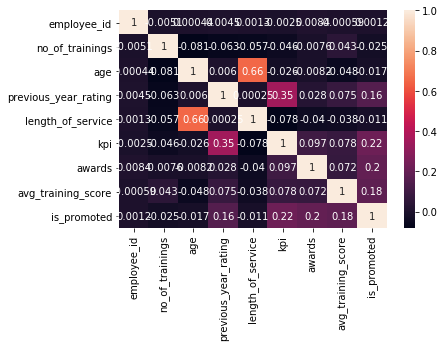

In [8]:
# Displays Correlation between Features through HeatMap - Ligther Color means Higher Correlation
sns.heatmap(train.corr(), annot = True);

In [9]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data
remove_duplicate(train)

'Checked Duplicates'

In [10]:
# Fills Missing Values in Train and Test :
train[ "previous_year_rating"] = train["previous_year_rating"].fillna(0)
test["previous_year_rating"] = test["previous_year_rating"].fillna(0)
# Creates a New Column to see if missing previous_year_rating and length_of_service = 1 Year are related
train['Fresher'] = train['previous_year_rating'].apply(lambda x: 'Fresher' if x ==0 else 'Experienced')
display( train[["previous_year_rating","length_of_service",'Fresher']][train['Fresher'] =='Fresher'] )
train["education"] = train["education"].ffill(axis = 0)
train["education"] = train["education"].bfill(axis = 0)
test["education"] = test["education"].ffill(axis = 0)
test["education"] = test["education"].bfill(axis = 0)
display("Train : ", train.info())
display("Test: ", test.info())

,previous_year_rating,length_of_service,Fresher
10,0.0,1,Fresher
23,0.0,1,Fresher
29,0.0,1,Fresher
56,0.0,1,Fresher
58,0.0,1,Fresher
...,...,...,...
54703,0.0,1,Fresher
54734,0.0,1,Fresher
54746,0.0,1,Fresher
54773,0.0,1,Fresher


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 15 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
kpi                     54808 non-null int64
awards                  54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
Fresher                 54808 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 6.7+ MB


'Train : '

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
kpi                     23490 non-null int64
awards                  23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


'Test: '

None

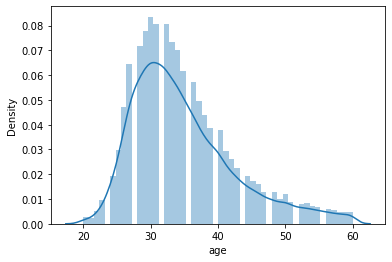

In [11]:
# Based on Age Distribution - Most of the Employees are in range 20-40 who will be also waiting for a Promotion
# so we have created 2 Bins 20-29, 29-39 and remaining 1 Bin for 39-49.
# displot -> plot a univariate(Single Feature) distribution of observations.
sns.distplot(train['age'])
train['age'] = pd.cut( x=train['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['age']  = pd.cut( x=test['age'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

In [12]:
# Split train into X_train (Features) and y_train (Target) :
X_train = train.drop('is_promoted',axis=1)
y_train = train['is_promoted']
y_train = y_train.to_frame()
X_test = test

In [13]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    return encoding_data
encoding_columns  = [ "region", "age","department", "education", "gender", "recruitment_channel"]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]
X_train_encode = data_encoding( encoding_strategy[1] , X_train , encoding_columns )
X_test_encode =  data_encoding( encoding_strategy[1] , X_test  , encoding_columns )
# Display Encoded Train and Test Features :
display(X_train_encode.head())
display(X_test_encode.head())

ELIF OneHotEncoding
ELIF OneHotEncoding


,employee_id,no_of_trainings,previous_year_rating,length_of_service,kpi,awards,avg_training_score,department_Analytics,department_Finance,department_HR,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,Fresher_Experienced,Fresher_Fresher
0,65438,1,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,65141,1,5.0,4,0,0,60,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,7513,1,3.0,7,0,0,50,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,2542,2,1.0,10,0,0,50,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4,48945,1,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,0,1,1,0


,employee_id,no_of_trainings,previous_year_rating,length_of_service,kpi,awards,avg_training_score,department_Analytics,department_Finance,department_HR,...,education_Below_secondary,education_Master,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40
0,8724,1,0.0,1,1,0,77,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,74430,1,3.0,5,0,0,51,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,72255,1,1.0,4,0,0,47,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,38562,3,2.0,9,0,0,65,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,64486,1,4.0,7,0,0,61,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [14]:
X_test_encode=X_test_encode.drop(['employee_id'],1)
X_test_encode.to_csv('X_test_encode.csv',index=False)

In [15]:
X_test1=pd.read_csv('X_test_encode.csv')
X_test1.head()

,no_of_trainings,previous_year_rating,length_of_service,kpi,awards,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,education_Below_secondary,education_Master,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40
0,1,0.0,1,1,0,77,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,3.0,5,0,0,51,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,1,1.0,4,0,0,47,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,3,2.0,9,0,0,65,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,4.0,7,0,0,61,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [16]:
#X_test2=X_test1


In [17]:
#obj=RobustScaler()
#transformer=obj.fit(X_test1)

In [18]:
#X_test1.head()

In [19]:
#X_test1[X_test1.columns]=transformer.transform(X_test1[X_test1.columns])

In [20]:
#X_test1.head()

In [21]:
#X_test3=X_test2

In [22]:
#X_test2[X_test2.columns]=transformer.transform(X_test2[X_test2.columns])

In [23]:
#X_test2.head()

In [24]:
#l=[[1,0,1,1,0,77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0]]


In [27]:
#l2=[[3,5,5,1,0,89,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1]]


In [26]:
#l2=transformer.transform(l2)
#l2

In [28]:
#print(transformer.transform(l))

In [29]:
#l=transformer.transform(l)

def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[0] , X_train_encode , X_train_encode.columns )
X_test_scale  = data_scaling( scaling_strategy [0] , X_test_encode  , X_test_encode.columns )
# Display Scaled Train and Test Features :
display(X_train_scale.head())
display(X_train_scale.columns)
display(X_train_scale.head())



In [30]:
#X_train_scale=X_train_scale.drop(['Fresher_Experienced', 'Fresher_Fresher','employee_id'],1)
X_train_encode=X_train_encode.drop(['Fresher_Experienced', 'Fresher_Fresher','employee_id'],1)

In [31]:
#X_test_scale=X_test_scale.drop(['employee_id'],1)
X_train_scale=X_train_encode
X_test_scale=X_test_encode

In [32]:
#def scaling_input(inp):
#    obj=RobustScaler()
#    #X_train_encode[X_train_encode.columns]=
#    obj.fit(X_train_encode[X_train_encode.columns])
#    out=obj.transform(inp)
#    return out
import pickle
#pickle.dump(scaling_input, open('scaling_input.pkl','wb'))


In [33]:
X_train_scale.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service', 'kpi',
       'awards', 'avg_training_score', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'regi

In [34]:
X_test_scale.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service', 'kpi',
       'awards', 'avg_training_score', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'regi

In [35]:
# Baseline Model Without Hyperparameters :
Classifiers = {'0.XGBoost' : XGBClassifier(),
               '1.CatBoost' : CatBoostClassifier(),
               '2.LightGBM' : LGBMClassifier()
 }

In [36]:
# Fine Tuned Model With-Hyperparameters :
Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1,
                                           n_estimators=494,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=494,
                                                 subsample=0.085,
                                                 max_depth=5,
                                                 scale_pos_weight=2.5),
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=494,
                                             max_depth=5,
                                             scale_pos_weight=2.5)
 }

In [37]:
voting_model = VotingClassifier(estimators=[

('XGBoost_Best', list(Classifiers.values())[0]),
('CatBoost_Best', list(Classifiers.values())[1]),
('LightGBM_Best', list(Classifiers.values())[2]),
],
voting='soft',weights=[5,5,5.2])
voting_model.fit(X_train_scale,y_train)
predictions_of_voting = voting_model.predict_proba( X_test_scale )[:,1]

0:	learn: 0.5626016	total: 165ms	remaining: 1m 21s
1:	learn: 0.5036024	total: 172ms	remaining: 42.2s
2:	learn: 0.4624237	total: 185ms	remaining: 30.3s
3:	learn: 0.4330408	total: 192ms	remaining: 23.5s
4:	learn: 0.3937108	total: 199ms	remaining: 19.4s
5:	learn: 0.3785230	total: 205ms	remaining: 16.7s
6:	learn: 0.3637022	total: 213ms	remaining: 14.8s
7:	learn: 0.3537083	total: 219ms	remaining: 13.3s
8:	learn: 0.3387470	total: 225ms	remaining: 12.1s
9:	learn: 0.3249177	total: 231ms	remaining: 11.2s
10:	learn: 0.3216024	total: 237ms	remaining: 10.4s
11:	learn: 0.3200777	total: 243ms	remaining: 9.77s
12:	learn: 0.3180032	total: 249ms	remaining: 9.21s
13:	learn: 0.3171047	total: 255ms	remaining: 8.73s
14:	learn: 0.3117220	total: 260ms	remaining: 8.31s
15:	learn: 0.3103344	total: 266ms	remaining: 7.94s
16:	learn: 0.3070025	total: 271ms	remaining: 7.61s
17:	learn: 0.3053684	total: 277ms	remaining: 7.32s
18:	learn: 0.3002745	total: 282ms	remaining: 7.06s
19:	learn: 0.2996924	total: 288ms	remain

177:	learn: 0.2456427	total: 1.24s	remaining: 2.21s
178:	learn: 0.2454974	total: 1.25s	remaining: 2.2s
179:	learn: 0.2453845	total: 1.25s	remaining: 2.19s
180:	learn: 0.2452976	total: 1.26s	remaining: 2.18s
181:	learn: 0.2452597	total: 1.27s	remaining: 2.17s
182:	learn: 0.2451502	total: 1.28s	remaining: 2.17s
183:	learn: 0.2450920	total: 1.28s	remaining: 2.16s
184:	learn: 0.2449815	total: 1.29s	remaining: 2.15s
185:	learn: 0.2448869	total: 1.29s	remaining: 2.14s
186:	learn: 0.2448332	total: 1.3s	remaining: 2.13s
187:	learn: 0.2447438	total: 1.3s	remaining: 2.12s
188:	learn: 0.2446827	total: 1.31s	remaining: 2.11s
189:	learn: 0.2445813	total: 1.32s	remaining: 2.1s
190:	learn: 0.2444689	total: 1.32s	remaining: 2.1s
191:	learn: 0.2443747	total: 1.33s	remaining: 2.09s
192:	learn: 0.2442561	total: 1.33s	remaining: 2.08s
193:	learn: 0.2437078	total: 1.34s	remaining: 2.07s
194:	learn: 0.2435788	total: 1.35s	remaining: 2.06s
195:	learn: 0.2434483	total: 1.35s	remaining: 2.06s
196:	learn: 0.243

339:	learn: 0.2322474	total: 2.3s	remaining: 1.04s
340:	learn: 0.2322160	total: 2.31s	remaining: 1.03s
341:	learn: 0.2321649	total: 2.31s	remaining: 1.03s
342:	learn: 0.2321315	total: 2.32s	remaining: 1.02s
343:	learn: 0.2320759	total: 2.33s	remaining: 1.01s
344:	learn: 0.2319926	total: 2.33s	remaining: 1.01s
345:	learn: 0.2319170	total: 2.34s	remaining: 1s
346:	learn: 0.2318737	total: 2.35s	remaining: 994ms
347:	learn: 0.2318603	total: 2.35s	remaining: 987ms
348:	learn: 0.2318425	total: 2.36s	remaining: 980ms
349:	learn: 0.2317480	total: 2.37s	remaining: 973ms
350:	learn: 0.2317135	total: 2.37s	remaining: 966ms
351:	learn: 0.2316689	total: 2.38s	remaining: 959ms
352:	learn: 0.2316141	total: 2.38s	remaining: 952ms
353:	learn: 0.2315767	total: 2.39s	remaining: 944ms
354:	learn: 0.2315348	total: 2.39s	remaining: 937ms
355:	learn: 0.2314060	total: 2.4s	remaining: 930ms
356:	learn: 0.2313472	total: 2.4s	remaining: 923ms
357:	learn: 0.2312756	total: 2.41s	remaining: 916ms
358:	learn: 0.2312

In [38]:
# Round off the Probability Results :
predictions = [int(round(value)) for value in predictions_of_voting]

In [39]:
# Create a Dataframe Table for Submission Purpose :
Result_Promoted = pd.DataFrame({'employee_id': test["employee_id"], 'is_promoted' : predictions})

In [40]:
Result_Promoted.to_csv("result.csv",index=False)

In [41]:
pickle.dump(voting_model, open('voting_model.pkl','wb'))
#model_LR = pickle.load(open('model_LR.pkl','rb'))

In [42]:
#print(voting_model.predict_proba(l)[:,1])

In [43]:
#print(voting_model.predict_proba(l2)[:,1])

In [44]:
#pickle.dump(transformer, open('tranformer.pkl','wb'))

In [45]:
#trans=pickle.load(open('tranformer.pkl','rb'))

In [46]:
#print(trans.transform(X_test3[X_test3.columns]))

In [49]:
predictions = voting_model.predict_proba(np.array([[3,5,5,1,0,89,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1]]))[:,1]
print('Predictions: ',predictions)
my_prediction=int(round(predictions[0]))

Predictions:  [0.97459297]


#[[3. 1. 5. 0. 0. 4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 # 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 # 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]]
data=[[3, 1, 5, 0 ,0, 4, 0, 1, 0 ,0, 0, 0 ,0, 0 ,0 ,0, 0, 0,
                             0, 0, 0, 0 ,0, 0,
  0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0, 0, 0, 0, 0 ,0, 0, 1, 0, 0 ,0,
  0, 0, 1, 0, 0 ,1, 0, 1, 0 ,1 ,0, 0]]
df=pd.DataFrame(data, columns = [ 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'kpi', 'awards', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R_and_D', 'department_Sales_Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_8', 'region_region_9', 'education_Bachelor',
       'education_Below_secondary', 'education_Master', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'age_20', 'age_30', 'age_40'])
X_train_encode=pd.read_csv('X_train_encode.csv')
obj=RobustScaler()
#X_train_encode[X_train_encode.columns]=
transformer=obj.fit(X_train_encode)
X_train_encode1=transformer.transform(X_train_encode)
scaled_data=transformer.transform(df)
#scaled_data=scaled.transform(inp_l)
print(df.head())
print('scaled_data: ',scaled_data)
my_prediction=voting_model.predict_proba(scaled_data)[:,1]
print('prediction: ',my_prediction)
predictions = [int(round(value)) for value in my_prediction]
my_prediction=predictions[0]
print('prediction: ',my_prediction)




#voting_model.predict_proba(df )[:,1]

X_train_scale.values